# Kaggle Data Visualization
- Make great data visualizations. A great way to see the power of coding!
- https://chartio.com/learn/charts/heatmap-complete-guide/
- https://towardsdatascience.com/reshaping-a-pandas-dataframe-long-to-wide-and-vice-versa-517c7f0995ad
- https://www.statology.org/pandas-wide-to-long/

## 7. Exercise: Final Project
## Swarm that are really SLOW

### 1.0.- Import libraries and read zipfile & dataset content

In [1]:
import zipfile as zfm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zipfile = 'BankCustChurn.zip'
dataset = 'Bank Customer Churn Prediction.csv'

with zfm.ZipFile(zipfile) as zf:
    datasets = zf.namelist()
    if dataset in zf.namelist():
        print(f'Dataset "{dataset}" founded in "{zipfile}"')
        # to see firsts dataset lines (first line == cols, found possible index)
        numln = 1
        for ln in zf.open(dataset):
            print(ln)
            if numln == 4: break
            numln += 1

Dataset "Bank Customer Churn Prediction.csv" founded in "BankCustChurn.zip"
b'customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn\r\n'
b'15634602,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n'
b'15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n'
b'15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n'


### 1.1.- Read data. Take first look

In [2]:
with zfm.ZipFile(zipfile) as zf:
    df = pd.read_csv(zf.open(dataset))
print(df.shape)
df.iloc[[0, 5, 9, -9, -5, -1]]

(10000, 12)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
9991,15769959,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


However, we can adapt the design of the scatter plot to feature a categorical variable (like "churn") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

<Axes: xlabel='churn', ylabel='balance'>

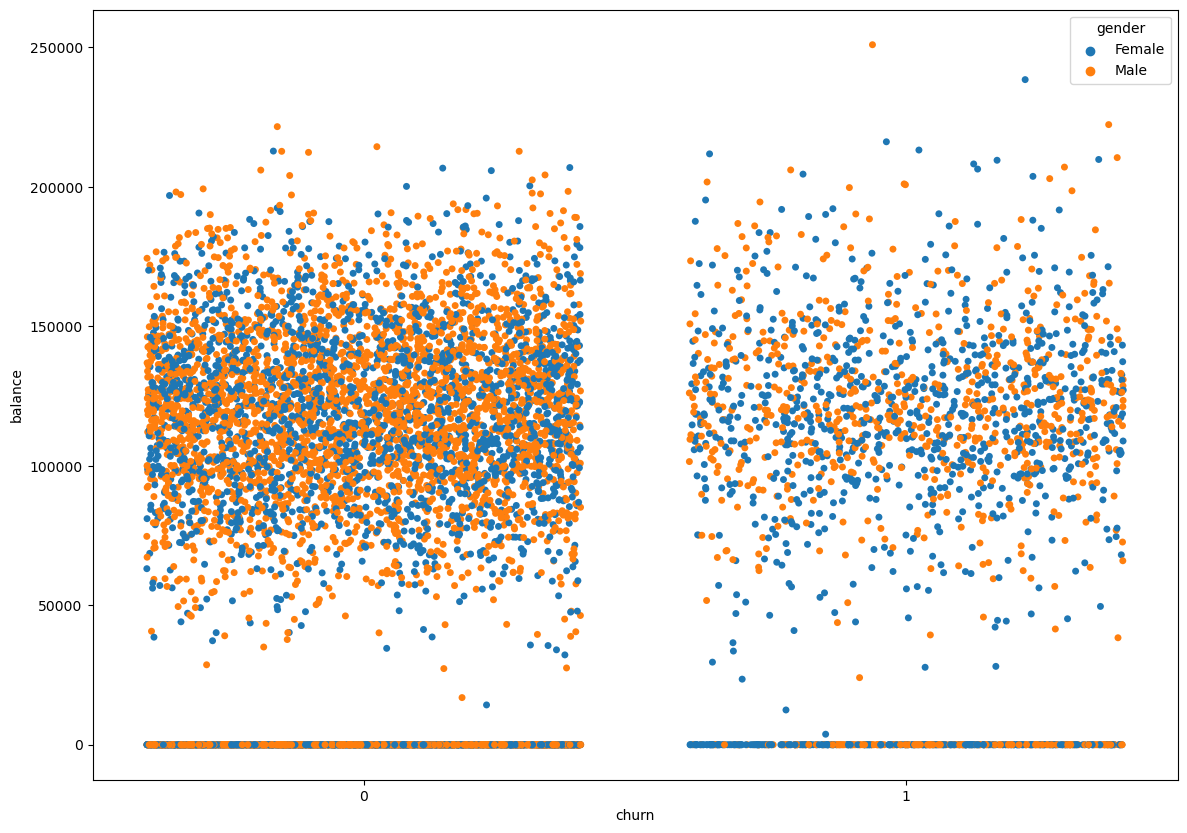

In [3]:
fig, axstrip1 = plt.subplots(figsize=(14, 10))
sns.stripplot(x=df.churn, y=df.balance, hue=df.gender, jitter=0.4, ax=axstrip1)

C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='churn', ylabel='age'>

C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


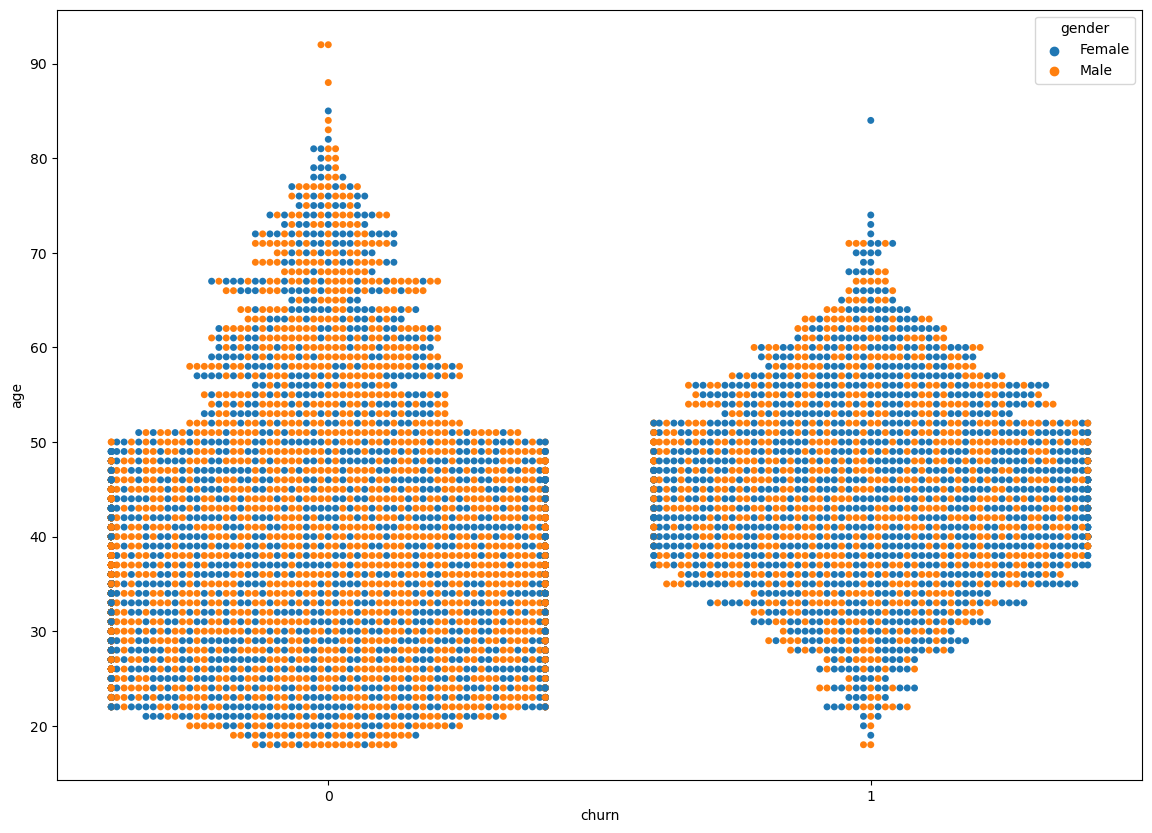

In [4]:
### This es TOO SLOW, that is the above .stripplot()
fig, axswarm1 = plt.subplots(figsize=(14, 10))
sns.swarmplot(x=df.churn, y=df.age, hue=df.gender, ax=axswarm1)

We can see that there are more clients that do not churn and also that inside the ones who churn there ara more females.
Let's see some numbers aboout this.

In [5]:
[col for col in df.columns if df[col].dtype == 'int64' or df[col].dtype == 'float64']
[col for col in df.columns if df[col].dtype != 'object']

['customer_id',
 'credit_score',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

NameError: name 'axhist1' is not defined

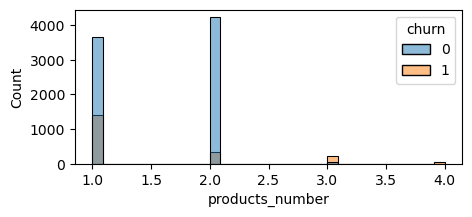

In [6]:
# See histo of all cols and can see that products_number and active_member could be useful
fig, axhist2 = plt.subplots(figsize=(5,2))
sns.histplot(data=df, x='products_number', hue='churn')
axhist1.set_title('Customers products_number Histogram')
### MORE products MORE churn

Text(0.5, 1.0, 'Customer active_member Histogram')

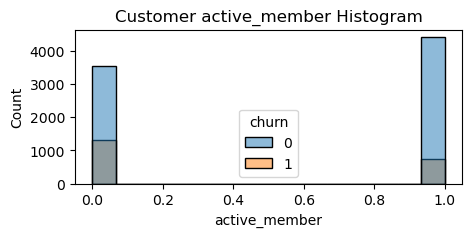

In [7]:
fig, axhist3 = plt.subplots(figsize=(5,2))
sns.histplot(data=df, x='active_member', hue='churn', ax=axhist3)
axhist3.set_title('Customer active_member Histogram')
### Active_member LESS Churn

<Axes: xlabel='churn', ylabel='products_number'>

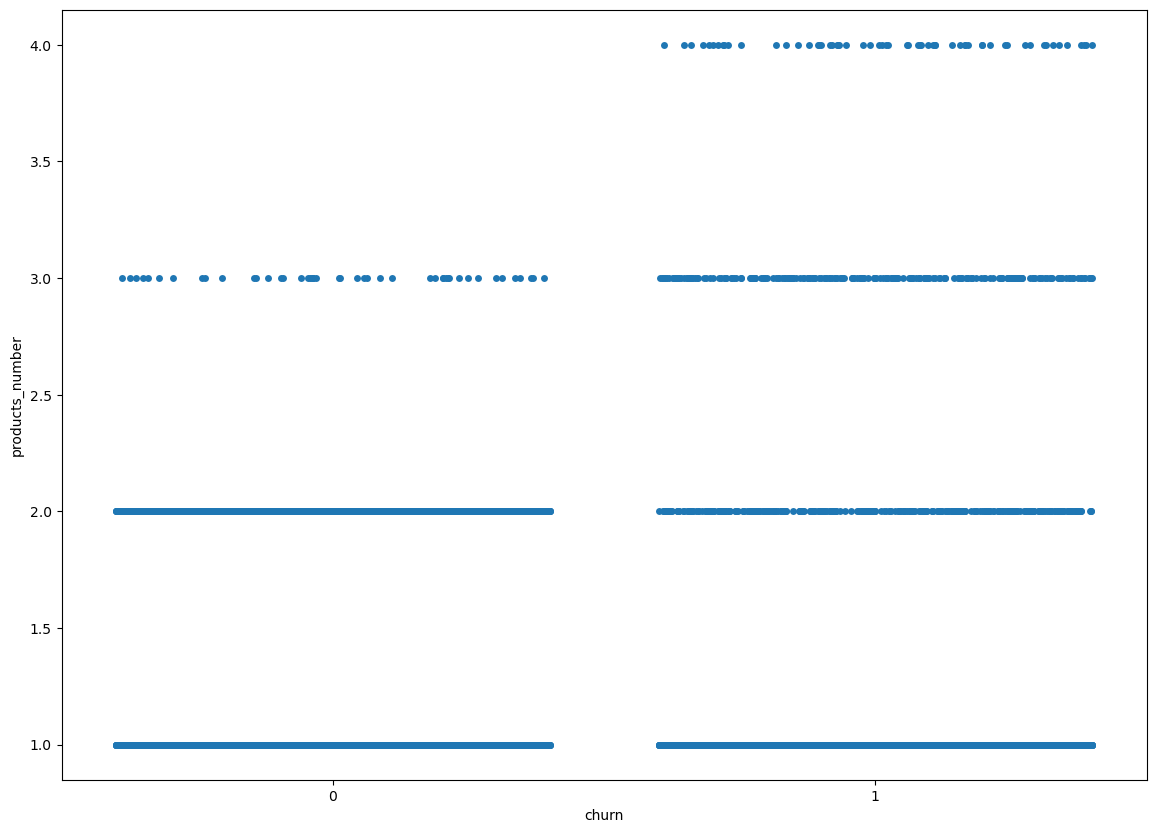

In [10]:
### swarmplot is VERY SLOW for to much rows instead stripplot...
fig, axstrip2 = plt.subplots(figsize=(14, 10))
sns.stripplot(x=df.churn, y=df.products_number, jitter=0.4,
              ax=axstrip2)

C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='churn', ylabel='products_number'>

C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmonti\.conda\envs\KglDV\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


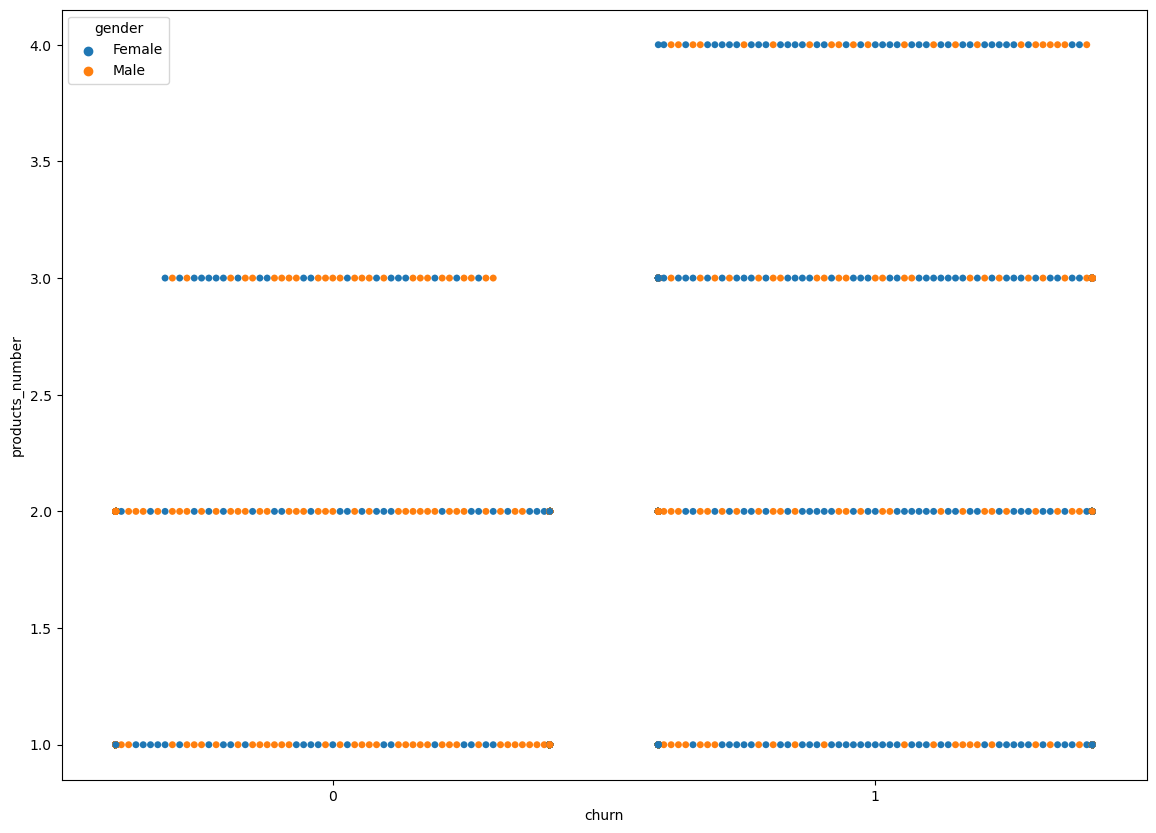

In [9]:
### swarmplot or splitplot
fig, axswarm2 = plt.subplots(figsize=(14, 10))
sns.swarmplot(x=df.churn, y=df.products_number, hue=df.gender, ax=axswarm2)

In [ ]:
### Scatter to see this relation
fig, axscat4 = plt.subplots()
sns.scatterplot(x=df.age, y=df.active_member, hue=df.churn, ax=axscat4)
axscat4.set_title('relation')

## 2. Bar Charts (and Pie Charts)
- Comparing quantities corresponding to different groups.
- in long-format table mk value_counts() or grupby()
#### Bank Customers vs Country
- value_counts of country
- .barchart value_counts by country

In [ ]:
df.country.value_counts()

In [ ]:
### sns.barplot a serie -> a function for diff cols
def bars_value_counts(col):
    vc = df[col].value_counts()
    if len(vc.index) > 5:
        lenght, hight = 12, 6
        rot = 90
    else:
        lenght, hight = 6, 4
        rot = 0
    fig, axe = plt.subplots(figsize=(lenght, hight))
    sns.barplot(x=vc.index, y=vc, ax=axe)
    axe.set_xticklabels(vc.index, rotation=rot)

In [ ]:
bars_value_counts('country')

In [ ]:
bars_value_counts('age')

In [ ]:
bars_value_counts('gender')

In [ ]:
# d1 = df.groupby('country')
# d1.first()
# df.groupby('country').count()

In [ ]:
### Funct. to show pie plots 
def func(pct, allvalues):
    #absolute = int(pct / 100.*np.sum(allvalues))
    absolute = int(pct / 100 * np.sum(allvalues))
    #return "{:.1f}%\n({:d} g)".format(pct, absolute)
    return f'{pct:.1f}%\n({absolute:,} custs.)'

def pie_value_counts(col):
    vc = df[col].value_counts()
    aupct = '%.0f%%'    # '%.0f%%'
    colors = sns.color_palette('pastel')[0:5]
    fig, axe = plt.subplots()
    axe.pie(vc, labels=vc.index, colors=colors,
            autopct=lambda pct: func(pct, vc))

In [ ]:
pie_value_counts('country')

In [ ]:
### Customer Activity Status
pie_value_counts('active_member')

In [ ]:
### Customer Retention
pie_value_counts('churn')

In [ ]:
### Customer Credit Card Usage
pie_value_counts('credit_card')

> https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

## 3. Distribution Graphs
- Histograms, KDEplots
- In a long-form data table an histogram for each column is posible

In [ ]:
### Bank Customer Credit Scores - credit_score histagram
g = sns.histplot(data=df.credit_score)
g.set_ylabel('Customer Count')

In [ ]:
### Customer Ages Histogram
sns.histplot(data=df.age)

### Correlation Heatmap

In [ ]:
df.iloc[[0, 5, 9, -9, -5, -1]]

In [ ]:
# d1 = df[['credit_score', 'age', 'tenure', 'balance']]
# d1

In [ ]:
sns.heatmap(data=df[['credit_score', 'age', 'tenure', 'balance',
                     'products_number', 'credit_card', 'active_member']])
## Investigate correlation heapmap fc projects

### Density Plot [mean(), median(), mode()]
- https://rpubs.com/Rvge_mvsrter/939193